In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

C:\Users\masoz\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\masoz\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Lo que funcionó:

In [2]:
def genes_faltantes(lista_genes):
    #Me fijo si en esta nueva lista de genes están los genes de la cadena y los predichos. 
    # Merge the two lists
    merged_list = genes_118predichos + genes_cadena
    # Find values in merged_list that are not in lista_genes
    values_not_in_lista_genes = [gene for gene in merged_list if gene not in lista_genes]

    if len(values_not_in_lista_genes) > 0:
        print("Values not present in lista_genes:")
        for value in values_not_in_lista_genes:
            if value in genes_118predichos:
                print(value, "came from genes_118predichos")
            elif value in genes_cadena:
                print(value, "came from genes_cadena")
            else:
                print(value, "origin is unknown")
    else:
        print("All values are present in lista_genes")

In [3]:
dataset_RNAseq_sc = pd.read_csv(r'..\Archivos\Grafo_co-expresion\dataset_sc.csv', 
                                sep=';', 
                                header = 0, 
                                index_col = 0)

In [4]:
# g = pd.read_csv(r'C:\Users\masoz\Desktop\TesisMaestria\Cadena respiratoria\genes.csv')
# # Para sacar las proteínas del ensamblado:
# for i in g.index:
#     if g.loc[i,'tipo_de_proteina'] == 'ensamblado/accesoria':
#         g = g.T
#         g.pop(i)
#         g = g.T
# genes_cadena = list(g['WormBase Gene ID'])
        
# genes_118predichos = pd.read_csv(r'C:\Users\masoz\Desktop\TesisMaestria\Cadena respiratoria\interseccion_de_SVM_RF_KNN-PCA.csv', header=None)
# genes_118predichos = genes_118predichos[0].tolist()        
        

In [5]:
#nos sacamos de arriba los genes que tienen todo nan o 0. 
df = dataset_RNAseq_sc[~(dataset_RNAseq_sc == 0).all(axis=1) & ~dataset_RNAseq_sc.isna().all(axis=1)]
df

,ADE:390_510,ADEsh:390_510,ADF:390_510,ADF:510_650,ADF_AWB_terminal_cells_but_undifferentiated,ADF:gt_650,ADL:330_390,ADL:390_510,ADL:510_650,ADL:gt_650,...,MSxpppaa,MSxpppap,MSxpppax,MSxpppp,MSxppppa,MSxppppp,MSxppppx,Z2/Z3:pseudotime_bin_1,Z2/Z3:pseudotime_bin_2,Z2/Z3:pseudotime_bin_3
WormBase Gene ID,,,,,,,,,,,,,,,,,,,,,
WBGene00000001,14.5,0.0,30.7,0.0,21.5,0.0,55.0,59.4,49.4,40.4,...,22.5,51.3,33.1,42.5,15.9,13.4,11.1,76.4,214.5,231.2
WBGene00000002,0.0,0.0,11.9,0.0,0.0,0.0,0.0,2.5,0.0,85.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WBGene00000003,48.7,0.0,247.7,0.0,200.2,0.0,341.7,502.3,198.3,0.0,...,193.8,194.5,75.5,73.3,290.3,159.1,137.2,0.5,2.3,0.0
WBGene00000004,223.4,234.4,253.1,37.5,444.6,0.0,296.5,72.7,0.0,11.5,...,119.3,68.0,6.0,73.9,27.9,46.2,59.9,23.1,7.9,0.0
WBGene00000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00271694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.2,39.3,51.5
WBGene00271701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WBGene00271703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0


## Vamos a ver la cantidad de 0s en el df

In [6]:
zero_counts = pd.DataFrame((df == 0).sum(axis=1).sort_values(ascending=True))
zero_counts.columns = ['cant_zero']
zero_counts

,cant_zero
WormBase Gene ID,
WBGene00006439,0
WBGene00010965,0
WBGene00006727,0
WBGene00010960,0
WBGene00010959,0
...,...
WBGene00020546,922
WBGene00018619,922
WBGene00018582,922


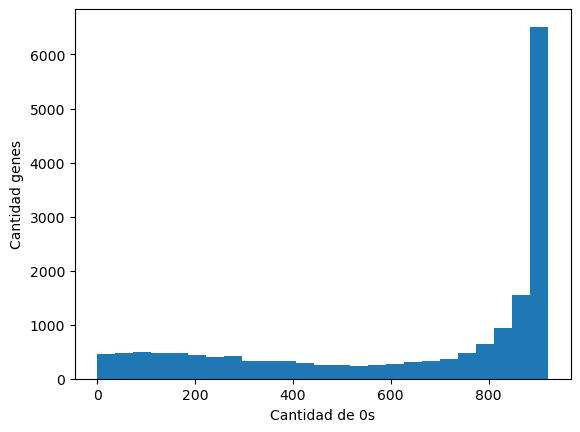

In [7]:
plt.hist(zero_counts['cant_zero'], bins= 25)
plt.ylabel('Cantidad genes')
plt.xlabel('Cantidad de 0s')
plt.show() 

### Con todos los datos

In [10]:
lista_genes = list(zero_counts.index)
new_df = df.T[lista_genes]
new_df

WormBase Gene ID,WBGene00006439,WBGene00010965,WBGene00006727,WBGene00010960,WBGene00010959,WBGene00019466,WBGene00000829,WBGene00010957,WBGene00010962,WBGene00010964,...,WBGene00007134,WBGene00018709,WBGene00007204,WBGene00045195,WBGene00018652,WBGene00020546,WBGene00018619,WBGene00018582,WBGene00000626,WBGene00007282
ADE:390_510,4882.8,6362.2,2352.4,4081.2,2467.6,1103.8,1451.7,5980.7,4414.7,3134.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADEsh:390_510,4883.3,3534.1,586.3,2355.7,1458.4,866.7,1182.5,3650.7,2327.6,2188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF:390_510,3947.6,2990.1,1285.1,2376.5,1306.2,1041.2,1023.5,3769.3,2507.1,2555.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF:510_650,4609.7,1986.3,880.6,1534.3,969.3,1029.4,637.4,2998.8,2205.5,1311.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF_AWB_terminal_cells_but_undifferentiated,5616.8,4709.0,1391.4,4376.0,1942.7,981.7,2221.7,5682.2,5121.4,2601.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSxppppp,5661.7,6717.5,812.1,10719.2,4657.9,750.7,3770.2,9129.4,9370.1,4393.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MSxppppx,5123.9,7098.6,1381.9,11037.4,4320.7,812.8,3141.7,11610.9,10031.0,5131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z2/Z3:pseudotime_bin_1,10232.9,5855.0,1773.8,7149.3,2254.5,349.1,1530.5,5517.2,4749.6,2770.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z2/Z3:pseudotime_bin_2,6820.5,4749.2,755.3,6422.4,2342.3,1086.3,2145.2,7855.4,7351.4,4896.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
new_df.to_csv(r'..\Archivos\Grafo_co-expresion\dataset_geneExpr_sinsacar0s.csv')

### Menos de 900 0s

In [12]:
# Me saco de arriba aquellos genes que tengan más de 900 nan
menos900 = zero_counts[zero_counts['cant_zero'] < 900]
lista_genes = list(menos900.index)
print(len(lista_genes))


11906


In [13]:
new_df = df.T[lista_genes]
new_df

WormBase Gene ID,WBGene00006439,WBGene00010965,WBGene00006727,WBGene00010960,WBGene00010959,WBGene00019466,WBGene00000829,WBGene00010957,WBGene00010962,WBGene00010964,...,WBGene00022231,WBGene00043702,WBGene00017390,WBGene00086569,WBGene00009404,WBGene00011601,WBGene00020485,WBGene00007131,WBGene00001904,WBGene00010787
ADE:390_510,4882.8,6362.2,2352.4,4081.2,2467.6,1103.8,1451.7,5980.7,4414.7,3134.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADEsh:390_510,4883.3,3534.1,586.3,2355.7,1458.4,866.7,1182.5,3650.7,2327.6,2188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF:390_510,3947.6,2990.1,1285.1,2376.5,1306.2,1041.2,1023.5,3769.3,2507.1,2555.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF:510_650,4609.7,1986.3,880.6,1534.3,969.3,1029.4,637.4,2998.8,2205.5,1311.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF_AWB_terminal_cells_but_undifferentiated,5616.8,4709.0,1391.4,4376.0,1942.7,981.7,2221.7,5682.2,5121.4,2601.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSxppppp,5661.7,6717.5,812.1,10719.2,4657.9,750.7,3770.2,9129.4,9370.1,4393.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MSxppppx,5123.9,7098.6,1381.9,11037.4,4320.7,812.8,3141.7,11610.9,10031.0,5131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z2/Z3:pseudotime_bin_1,10232.9,5855.0,1773.8,7149.3,2254.5,349.1,1530.5,5517.2,4749.6,2770.9,...,0.9,0.0,0.0,0.0,254.3,10.7,0.0,0.0,0.0,67.9
Z2/Z3:pseudotime_bin_2,6820.5,4749.2,755.3,6422.4,2342.3,1086.3,2145.2,7855.4,7351.4,4896.3,...,0.0,0.0,0.0,0.0,37.0,110.9,0.0,0.0,0.0,38.6


In [14]:
new_df.to_csv(r'..\Archivos\Grafo_co-expresion\dataset_geneExpr_menos900_0s.csv')

### Menos de 800 0s

In [15]:
# Me saco de arriba aquellos genes que tengan más de 900 nan
menos900 = zero_counts[zero_counts['cant_zero'] < 800]
lista_genes = list(menos900.index)
print(len(lista_genes))

8105


In [16]:
new_df = df.T[lista_genes]
new_df

WormBase Gene ID,WBGene00006439,WBGene00010965,WBGene00006727,WBGene00010960,WBGene00010959,WBGene00019466,WBGene00000829,WBGene00010957,WBGene00010962,WBGene00010964,...,WBGene00008603,WBGene00016671,WBGene00004913,WBGene00018184,WBGene00019298,WBGene00017720,WBGene00008432,WBGene00017190,WBGene00021125,WBGene00001715
ADE:390_510,4882.8,6362.2,2352.4,4081.2,2467.6,1103.8,1451.7,5980.7,4414.7,3134.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADEsh:390_510,4883.3,3534.1,586.3,2355.7,1458.4,866.7,1182.5,3650.7,2327.6,2188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADF:390_510,3947.6,2990.1,1285.1,2376.5,1306.2,1041.2,1023.5,3769.3,2507.1,2555.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.7,0.0,0.0
ADF:510_650,4609.7,1986.3,880.6,1534.3,969.3,1029.4,637.4,2998.8,2205.5,1311.7,...,0.0,35.4,0.0,0.0,0.0,0.0,17.7,0.0,0.0,0.0
ADF_AWB_terminal_cells_but_undifferentiated,5616.8,4709.0,1391.4,4376.0,1942.7,981.7,2221.7,5682.2,5121.4,2601.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSxppppp,5661.7,6717.5,812.1,10719.2,4657.9,750.7,3770.2,9129.4,9370.1,4393.5,...,0.0,0.0,0.0,14.7,0.0,0.0,0.0,0.0,0.0,0.0
MSxppppx,5123.9,7098.6,1381.9,11037.4,4320.7,812.8,3141.7,11610.9,10031.0,5131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z2/Z3:pseudotime_bin_1,10232.9,5855.0,1773.8,7149.3,2254.5,349.1,1530.5,5517.2,4749.6,2770.9,...,0.0,0.0,9.6,3.2,1.6,0.0,0.0,0.0,0.0,0.0
Z2/Z3:pseudotime_bin_2,6820.5,4749.2,755.3,6422.4,2342.3,1086.3,2145.2,7855.4,7351.4,4896.3,...,0.0,1.3,3.6,0.0,0.0,0.0,0.1,0.0,0.0,0.0


In [17]:
new_df.to_csv(r'..\Archivos\Grafo_co-expresion\dataset_geneExpr_menos800_0s.csv')